Draw cards alternatingly from two stacks and figure out which one has more wins (vs blanks).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ipywidgets as widgets
from functools import partial

In [3]:
def draw_cards(p_win_1, p_win_2, n_cards, seed=None):
    np.random.seed(seed)
    # alternate between drawing from stack 1 and 2 so we get the same initial results for different n
    # transpose output so we can just unpack the results for each stack
    return np.random.binomial(1, (p_win_1, p_win_2), size=(n_cards, 2)).T

def repeated_experiment_means(p_win_1, p_win_2, n_cards, n_repeats, seed=0):
    results = []
    for i in range(n_repeats):
        wins = draw_cards(p_win_1, p_win_2, n_cards, seed=seed+i*n_cards*2)
        means = wins.mean(1)
        results.append(means)
    return np.array(results)

def interactive_experiment():
    button = widgets.Button(description="Draw Cards")
    out    = widgets.Output()

    def update_interactive_experiment(n):
        stack1, stack2 = draw_cards(
            p_win_1 = 0.5,
            p_win_2 = 0.4,
            n_cards = n,
            seed     = 0
        )
        fig, ax  = plt.subplots(num=1)
        ax.bar([1, 2], [sum(stack1), sum(stack2)])
        ax.set_xticks([1, 2])
        ax.set_xlabel('Stack')
        ax.set_title(f'Wins after drawing {n} cards')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    def get_next_n(n):
        while True:
            n += 1
            yield n

    def get_button_cb():
        n = get_next_n(0)
        def on_button_clicked(b):
            with out:
                out.clear_output(True)
                update_interactive_experiment(next(n))
                plt.show()
        return on_button_clicked

    button.on_click(get_button_cb())
    return widgets.HBox([button,out])

def plot_wins(stack1, stack2, **plot_kwargs):
    fig, ax = plt.subplots()
    ax.plot(
        range(1,len(stack1)+1), 
        stack1.cumsum(), 
        label='Stack 1', drawstyle='steps', **plot_kwargs
    )
    ax.plot(
        range(1,len(stack2)+1), 
        stack2.cumsum(), 
        label='Stack 2', drawstyle='steps', **plot_kwargs
    )
    ax.set_xlabel('Cards')
    ax.set_ylabel('Number of wins')
    ax.legend()
    
    return fig, ax
    
def plot_p_win(stack1, stack2, show_se=2):
    m1 = stack1.mean()
    m2 = stack2.mean()
    e1 = stack1.std() / np.sqrt(len(stack1))
    e2 = stack2.std() / np.sqrt(len(stack2))

    fig, ax = plt.subplots(figsize=(3,4))
    ax.bar([1, 2], [m1, m2], yerr=[e1, e2])
    ax.set_xticks([1, 2])
    ax.set_xlabel('Stack')
    ax.set_ylabel('P(win)')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return fig, ax
    
def plot_experiment(means, n_bins=21):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4), sharey=True, gridspec_kw={'width_ratios': [2, 1]})
    ax[0].plot(means)
    ax[0].legend(['Stack 1', 'Stack 2'])
    ax[0].set_ylabel('p(win)')
    ax[0].set_xlabel('Experiment')

    bins   = np.linspace(0, 1, n_bins)
    pd1, _ = np.histogram(means[:,0], bins=bins)
    pd2, _ = np.histogram(means[:,1], bins=bins)
    bc = (bins[1:] + bins[:-1]) / 2
    ax[1].barh(bc, pd1, height=1/len(bins), alpha=.5)
    ax[1].barh(bc, pd2, height=1/len(bins), alpha=.5)
    ax[1].set_xlabel('Count')
    
    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)

    return fig, ax

### Draw cards from two different stacks, one from each stack at a time

In [4]:
interactive_experiment()

### Visualise the course of the experiment

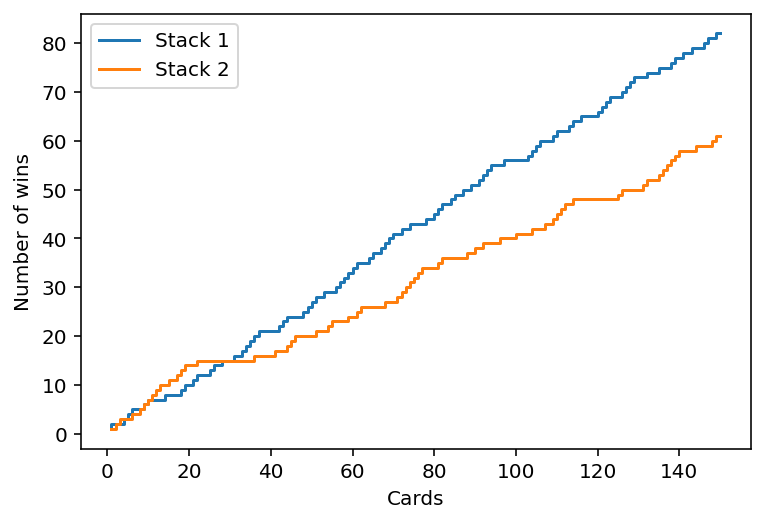

In [5]:
stack1, stack2 = draw_cards(
    p_win_1 = 0.5,
    p_win_2 = 0.4,
    n_cards = 150,
    seed     = 0
)

plot_wins(stack1, stack2);

### Repeat the experiment

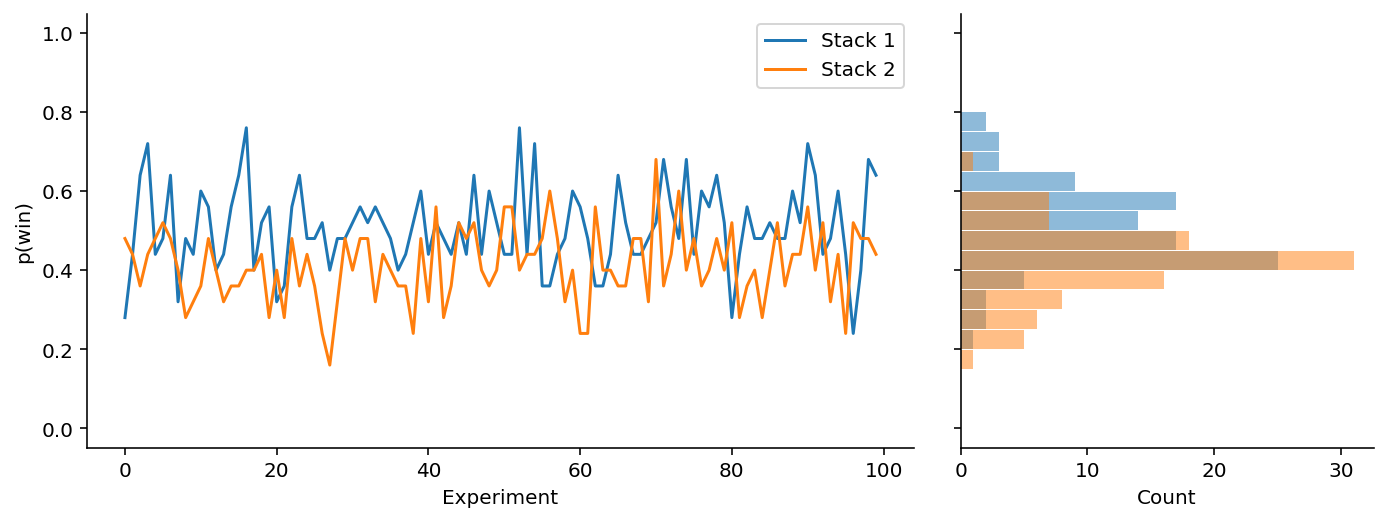

In [6]:
means = repeated_experiment_means(
    p_win_1  = 0.5,
    p_win_2  = 0.4,
    n_cards  = 25,
    n_repeats = 100,
    seed      = 1
)
fig, ax = plot_experiment(means)
fig.tight_layout(pad=2)

### Perform a single small experiment with error bars to measure uncertainty

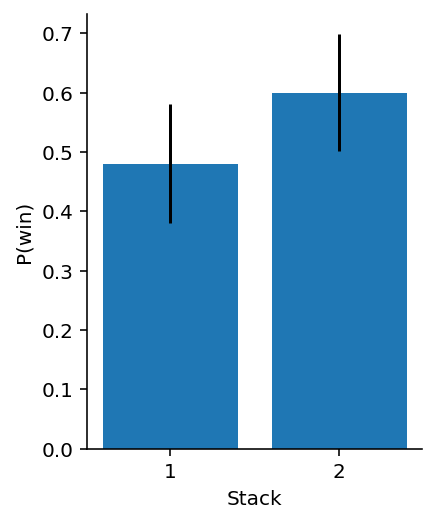

In [7]:
stack1, stack2 = draw_cards(
    p_win_1 = 0.5,
    p_win_2 = 0.4,
    n_cards = 25,
    seed     = 0
)
plot_p_win(stack1, stack2);

In [8]:
m1 = stack1.mean()
m2 = stack2.mean()
n  = len(stack1)
np.sqrt(m1 * (1 - m1) / n), np.sqrt(m2 * (1 - m2) / n)

(0.09991996797437437, 0.09797958971132711)

In [9]:
np.sqrt(.5 * (1 - .5) / n), np.sqrt(.6 * (1 - .6) / n)

(0.1, 0.09797958971132711)

### Perform a bigger experiment

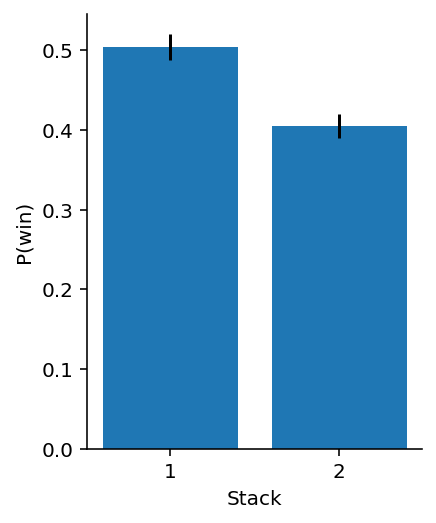

In [10]:
stack1, stack2 = draw_cards(
    p_win_1 = 0.5,
    p_win_2 = 0.4,
    n_cards = 1000,
    seed     = 0
)
plot_p_win(stack1, stack2);